# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

# FUNCIÓN mult_dec_pi

In [79]:
from math import pi
def mult_dec_pi(a, b):
    
    if 1<=a<=15 and 1<=b<=15 :
        pi_dec = str(pi)[1:]
        dig_1  = int(pi_dec[a])
        dig_2  = int(pi_dec[b])
        result = dig_1 * dig_2
    else:
        result = 'Error'
    
    return result


In [80]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [81]:
mult_dec_pi(a=5, b=4)
# 45.0

45

In [82]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [83]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [84]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

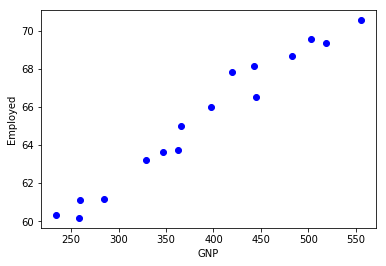

In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

# MATRIZ DE DISEÑO X y VECTOR Y

In [86]:
#Matriz de diseño y Y
Y           = data[:,1]
n_samples   = Y.shape[0]
X           = np.c_[np.ones(n_samples), data[:,2]]  

# ESTIMACIÓN MATRICIAL DEL VECTOR BETA

In [87]:
#Estimación
beta        = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y
beta 

array([5.18435898e+01, 3.47522943e-02])

# PREDICCIÓN

In [88]:
emplyed_fit = beta[0]+beta[1]*data[:, 2]
emplyed_fit 

array([59.98567007, 60.8592385 , 60.81155835, 61.734058  , 63.27622581,
       63.90260117, 64.54155685, 64.46256489, 65.65654946, 66.41105653,
       67.2308284 , 67.29258322, 68.61866127, 69.31012767, 69.8512904 ,
       71.1274294 ])

# PLOT DE LA REGRESIÓN

Text(0,0.5,'Employed')

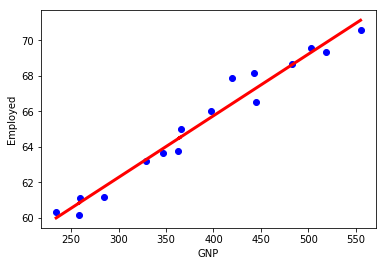

In [89]:
#Plot de la regresión
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.plot(data[:, 2], emplyed_fit, 'r', lw=3)
plt.xlabel("GNP")
plt.ylabel("Employed")

# PARÁMETROS DE LA REGRESIÓN

In [90]:
print("Parámetros")
print("Beta0 = "+ str(beta[0]))
print("Beta1 = "+ str(beta[1]))

Parámetros
Beta0 = 51.84358978188415
Beta1 = 0.03475229434762917


# Exercise 01.3

Analyze the baby names dataset using pandas

In [91]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [92]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [93]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [94]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

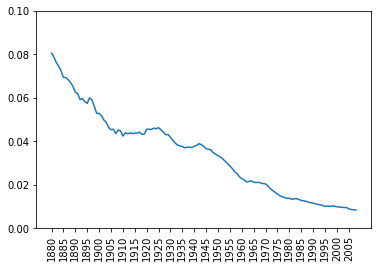

In [95]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

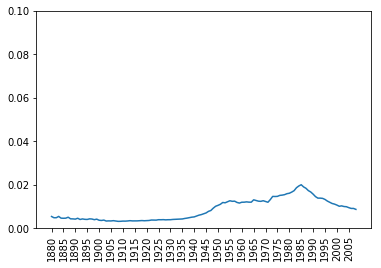

In [96]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [97]:
boys["decadas"] = 10 * (boys['year'] // 10)
boys_= pd.pivot_table(boys, index='name',values="prop",columns="decadas", aggfunc=np.sum)
boys_

for x in range(1880,2005,10):
    print("En la década " + str(x) + " el nombre más popular es " + boys_.loc[boys_[x].idxmax()].name)

En la década 1880 el nombre más popular es John
En la década 1890 el nombre más popular es John
En la década 1900 el nombre más popular es John
En la década 1910 el nombre más popular es John
En la década 1920 el nombre más popular es Robert
En la década 1930 el nombre más popular es Robert
En la década 1940 el nombre más popular es James
En la década 1950 el nombre más popular es James
En la década 1960 el nombre más popular es Michael
En la década 1970 el nombre más popular es Michael
En la década 1980 el nombre más popular es Michael
En la década 1990 el nombre más popular es Michael
En la década 2000 el nombre más popular es Jacob


# Exercise 01.4

Which has been the most popular girl name?


In [98]:
girl=pd.pivot_table(girls,index="name",values="prop",aggfunc=np.sum)
girl

,prop
name,
Aaliyah,0.019748
Aaron,0.000805
Abagail,0.001326
Abbey,0.007409
Abbie,0.022804
Abbigail,0.003392
Abby,0.025351
Abigail,0.123764
Abigale,0.001207


In [99]:
girl_most_pop=girl.sort_values(by="prop",ascending=False)
girl_most_pop

,prop
name,
Mary,4.511860
Elizabeth,1.392100
Margaret,1.360965
Helen,1.234222
Anna,1.195867
Dorothy,1.065111
Barbara,1.001579
Patricia,0.999798
Ruth,0.942272


In [100]:
print("El nombre más popular es Mary")

El nombre más popular es Mary


# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [101]:
new = girls[girls['year'] < 2000]
new.list = new['name']
girls["Check"] = girls["name"].isin(new.list)
girls.new = girls[girls['Check'] == False]

C:\Users\anmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\anmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [102]:
girls.agrup=pd.pivot_table(girls.new,index="name",values="prop",aggfunc=np.sum)
girls.agrup

C:\Users\anmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,prop
name,
Adalyn,0.000428
Adalynn,0.000160
Adamaris,0.000272
Addisyn,0.000724
Addyson,0.002073
Adelyn,0.000415
Adison,0.000509
Adyson,0.000589
Ainsley,0.002692


In [103]:
girls.fin=girls.agrup.sort_values(by="prop",ascending=False)
girls.fin

C:\Users\anmag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,prop
name,
Nevaeh,0.015377
Keira,0.005825
Reese,0.005638
Cadence,0.004373
Janiya,0.002853
Ximena,0.002745
Ainsley,0.002692
Amya,0.002649
Kaydence,0.002447


In [104]:
print("El nuevo nombre más popular de niña es Nevaeh")

El nuevo nombre más popular de niña es Nevaeh
